### Импортирование библиотек

In [1]:
import pandas as pd
import numpy as np
import datetime
import time
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
events_df = pd.read_csv('events.csv')
events_df.head()

,timestamp,visitorid,event,itemid,transactionid
0,1433221332117,257597,view,355908,NaN
1,1433224214164,992329,view,248676,NaN
2,1433221999827,111016,view,318965,NaN
3,1433221955914,483717,view,253185,NaN
4,1433221337106,951259,view,367447,NaN


In [3]:
events_df.describe()

,timestamp,visitorid,itemid,transactionid
count,2.756101e+06,2.756101e+06,2.756101e+06,22457.000000
mean,1.436424e+12,7.019229e+05,2.349225e+05,8826.497796
std,3.366312e+09,4.056875e+05,1.341954e+05,5098.996290
min,1.430622e+12,0.000000e+00,3.000000e+00,0.000000
25%,1.433478e+12,3.505660e+05,1.181200e+05,4411.000000
50%,1.436453e+12,7.020600e+05,2.360670e+05,8813.000000
75%,1.439225e+12,1.053437e+06,3.507150e+05,13224.000000
max,1.442545e+12,1.407579e+06,4.668670e+05,17671.000000


In [4]:
all_customers = events_df.visitorid.unique()
print(all_customers.size)

1407580


In [5]:
customer_purchased = events_df[events_df.transactionid.notnull()].visitorid.unique()
print(customer_purchased.size)

11719


In [9]:
events_df[events_df.visitorid == 102019].sort_values('timestamp')

,timestamp,visitorid,event,itemid,transactionid
19690,1433175714335,102019,view,49521,NaN
19501,1433175801314,102019,addtocart,49521,NaN
14842,1433175812596,102019,view,150318,NaN
19573,1433175871497,102019,view,49521,NaN
8701,1433175894837,102019,view,49521,NaN
19708,1433175945872,102019,view,150318,NaN
8740,1433176042269,102019,view,49521,NaN
814,1433176736375,102019,transaction,150318,13556.0
19724,1433176736422,102019,transaction,49521,13556.0


In [10]:
events_df['event'].unique()

array(['view', 'addtocart', 'transaction'], dtype=object)

In [11]:
events_count = events_df['event'].value_counts()

In [12]:
events_count

event
view           2664312
addtocart        69332
transaction      22457
Name: count, dtype: int64

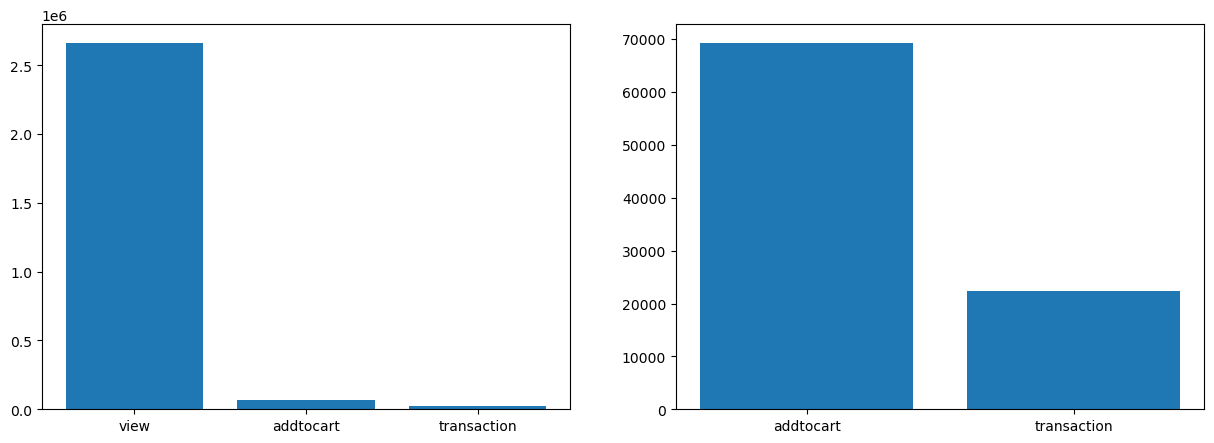

In [15]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.bar(events_count.index, events_count.values)

plt.subplot(1,2,2)
plt.bar(events_count.index[1:], events_count.values[1:])

plt.show()

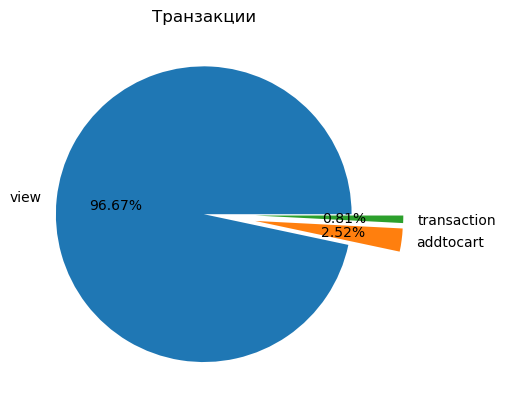

In [17]:
plt.title('Транзакции')
explode = (0 ,0.35, 0.35)
plt.pie(events_count.values, explode=explode, labels=events_count.index, autopct="%1.2f%%")
plt.show()

In [18]:
grouped = events_df.groupby('event')['itemid'].apply(np.array)

In [19]:
grouped

event
addtocart      [5206, 10572, 255275, 356475, 312728, 63312, 1...
transaction    [356475, 15335, 81345, 150318, 310791, 54058, ...
view           [355908, 248676, 318965, 253185, 367447, 22556...
Name: itemid, dtype: object

### Наиболее частые просмотры

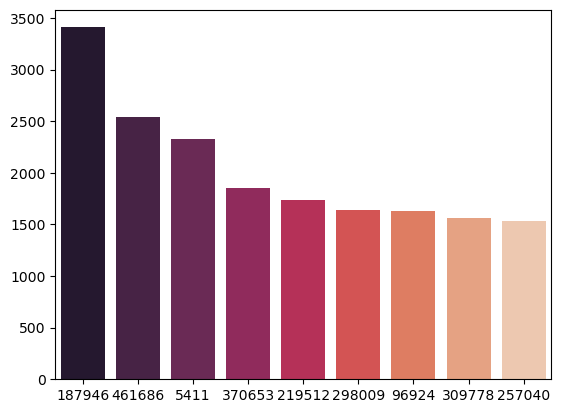

In [20]:
import operator
views = grouped['view']
count_view = {}
views = np.array(views[:])
unique, counts = np.unique(views, return_counts=True)
count_view = dict(zip(unique, counts))
sort_count_view = sorted(count_view.items(), key=operator.itemgetter(1), reverse=True)
x = [i[0] for i in sort_count_view[:9]]
y = [i[1] for i in sort_count_view[:9]]
sns.barplot(x=x,y=y, order=x, palette='rocket')
plt.show()

### Наиболее частые добавления в корзинку

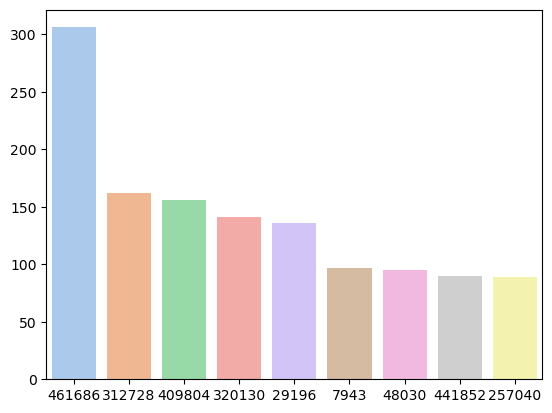

In [21]:
addtocart = grouped['addtocart']
count_addtocart = {}
addtocart = np.array(addtocart[:])
unique, counts = np.unique(addtocart, return_counts=True)
count_addtocart = dict(zip(unique, counts))
sort_count_addtocart = sorted(count_addtocart.items(), key=operator.itemgetter(1), reverse=True)
x = [i[0] for i in sort_count_addtocart[:9]]
y = [i[1] for i in sort_count_addtocart[:9]]
sns.barplot(x=x,y=y, order=x, palette='pastel')
plt.show()

### Наиболее частые покупки

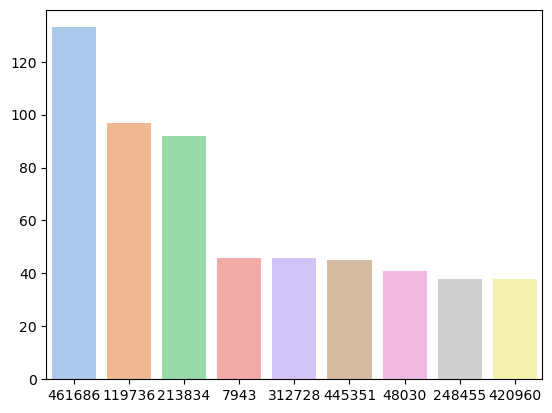

In [22]:
transaction = grouped['transaction']
count_transaction = {}
transaction = np.array(transaction[:])
unique, counts = np.unique(transaction, return_counts=True)
count_transaction = dict(zip(unique, counts))
sort_count_transaction = sorted(count_transaction.items(), key=operator.itemgetter(1), reverse=True)
x = [i[0] for i in sort_count_transaction[:9]]
y = [i[1] for i in sort_count_transaction[:9]]
sns.barplot(x=x,y=y, order=x, palette='pastel')
plt.show()

### Построение рекоммендации

In [24]:
customer_purchased = events_df[events_df.transactionid.notnull()].visitorid.unique()

purchased_items = []

for customer in customer_purchased:
    purchased_items.append(list(events_df.loc[(events_df.visitorid == customer) & (events_df.transactionid.notnull())].itemid.values))

In [ ]:
purchased_items[:5]

[[356475],
 [15335,
  380775,
  237753,
  317178,
  12836,
  400969,
  105792,
  25353,
  200793,
  80582,
  302422],
 [81345],
 [150318, 49521],
 [310791, 299044]]

In [26]:
def recommend_items(item_id, purchased_items):
    recommendation_list = []
    for x in purchased_items:
        if item_id in x:
            recommendation_list += x
    recommendation_list = list(set(recommendation_list) - set([item_id]))
    return recommendation_list

In [27]:
recommend_items(200793, purchased_items)

[105792, 12836, 80582, 380775, 15335, 400969, 25353, 302422, 237753, 317178]

In [28]:
recommend_items(7943, purchased_items)

[65540,
 450565,
 79877,
 40970,
 215051,
 323599,
 325652,
 278549,
 67614,
 172063,
 352290,
 428067,
 299044,
 393252,
 176162,
 210984,
 251945,
 262186,
 268336,
 225329,
 14387,
 106547,
 38965,
 272438,
 464954,
 415810,
 438338,
 102471,
 450641,
 79956,
 125016,
 137305,
 75873,
 421987,
 258148,
 346212,
 464998,
 176231,
 153708,
 213102,
 319602,
 436344,
 446590,
 118914,
 161925,
 413834,
 438412,
 376974,
 241807,
 368788,
 254101,
 315543,
 8347,
 71836,
 436379,
 239774,
 260256,
 454818,
 444593,
 448690,
 290999,
 377018,
 104634,
 270525,
 399550,
 452802,
 18626,
 98498,
 108740,
 368841,
 37068,
 409804,
 405714,
 133332,
 276704,
 94437,
 67814,
 202983,
 116968,
 57577,
 166122,
 176363,
 47334,
 399592,
 424186,
 139515,
 61705,
 182539,
 416017,
 241940,
 170262,
 354585,
 164130,
 461093,
 393509,
 370984,
 444712,
 319797,
 115001,
 266553,
 268604,
 391484,
 248127,
 444741,
 373064,
 264521,
 246090,
 385355,
 41295,
 203090,
 254290,
 188754,
 457045,
 57

In [32]:
recommend_items(309778, purchased_items)

[222208,
 49156,
 242694,
 344071,
 286731,
 257040,
 18454,
 250908,
 299038,
 212006,
 428072,
 335913,
 49196,
 65580,
 134191,
 316467,
 409655,
 231482,
 143418,
 130113,
 279618,
 186435,
 138309,
 441415,
 184391,
 108618,
 46156,
 206925,
 74833,
 29791,
 420960,
 376934,
 174185,
 434282,
 307306,
 59508,
 281717,
 161911,
 89212,
 36995,
 403591,
 362634,
 52367,
 216207,
 405649,
 191640,
 307355,
 260256,
 358565,
 293038,
 444593,
 457906,
 354484,
 138427,
 466109,
 173253,
 353482,
 393419,
 15564,
 23762,
 290003,
 26839,
 301284,
 399592,
 137454,
 411886,
 79097,
 139515,
 362760,
 283916,
 369933,
 342288,
 218385,
 356626,
 107792,
 61716,
 441620,
 346384,
 143643,
 120098,
 217387,
 387373,
 361777,
 47415,
 362807,
 132418,
 346436,
 289096,
 8523,
 374092,
 186702,
 381265,
 457045,
 360790,
 150877,
 58719,
 446815,
 150882,
 81252,
 440677,
 224614,
 435557,
 101747,
 456056,
 189818,
 294267,
 58752,
 257412,
 441734,
 37254,
 231819,
 284045,
 214415,
 11663